# Variable Relationship Tests (correlation)
- Pearson’s Correlation Coefficient
- Spearman’s Rank Correlation
- Kendall’s Rank Correlation
- Chi-Squared Test

## Correlation Test
Correlation Measures whether greater values of one variable correspond to greater values in the other. Scaled to always lie between +1 and −1

- Correlation is Positive when the values increase together.
- Correlation is Negative when one value decreases as the other increases.
- A correlation is assumed to be linear.
- 1 is a perfect positive correlation
- 0 is no correlation (the values don’t seem linked at all)
- -1 is a perfect negative correlation

## Correlation Methods
- **Pearson's Correlation Test:** assumes the data is normally distributed and measures linear correlation.
- **Spearman's Correlation Test:** does not assume normality and measures non-linear correlation.
- **Kendall's Correlation Test:** similarly does not assume normality and measures non-linear correlation, but it less commonly used.


## Difference Between Pearson's and Spearman's 
Pearson's Test | Spearman's Test
---------------|----------------
Paramentric Correlation | Non-parametric 
Linear relationship | Non-linear relationship
Continuous variables | continuous or ordinal variables
Propotional change | Change not at constant rate

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
sns.set(font_scale=2, palette= "viridis")
from sklearn.preprocessing import scale
import researchpy as rp
from scipy import stats

In [3]:
data = pd.read_csv('../data/pulse_data.csv')
data.head() 

,Height,Weight,Age,Gender,Smokes,Alcohol,Exercise,Ran,Pulse1,Pulse2,BMI,BMICat
0,1.73,57.0,18,Female,No,Yes,Moderate,No,86.0,88.0,19.045073,Underweight
1,1.79,58.0,19,Female,No,Yes,Moderate,Yes,82.0,150.0,18.101807,Underweight
2,1.67,62.0,18,Female,No,Yes,High,Yes,96.0,176.0,22.230987,Normal
3,1.95,84.0,18,Male,No,Yes,High,No,71.0,73.0,22.090730,Normal
4,1.73,64.0,18,Female,No,Yes,Low,No,90.0,88.0,21.383942,Normal


##  Pearson’s Correlation Coefficient
Tests whether two samples have a linear relationship.

### Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

### Interpretation
- H0: There is a relationship between two variables 
- Ha: There is no relationship between two variables 


__Question: Is there any relationship between height and weight?__

In [4]:
data.Height.corr(data.Weight)

0.7413041988574964

In [5]:
data.Height.corr(data.Weight, method="spearman")

0.7535418080977205

In [6]:
stats.pearsonr(data['Height'], data['Weight'])

(0.7413041988574969, 4.5627070950916043e-20)

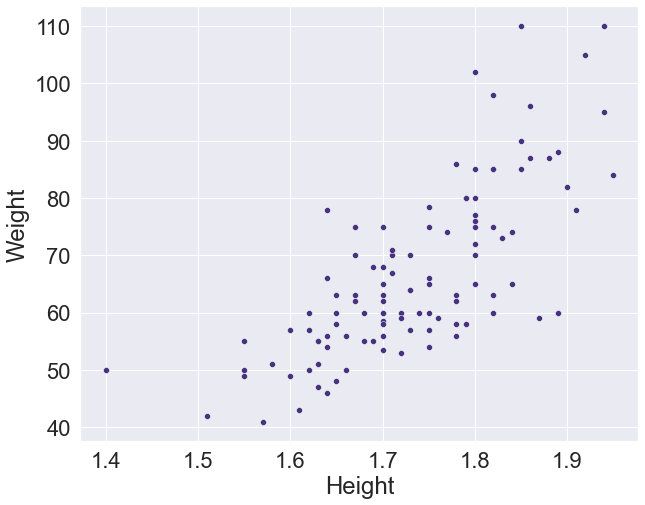

In [7]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='Height', y="Weight")
plt.show()

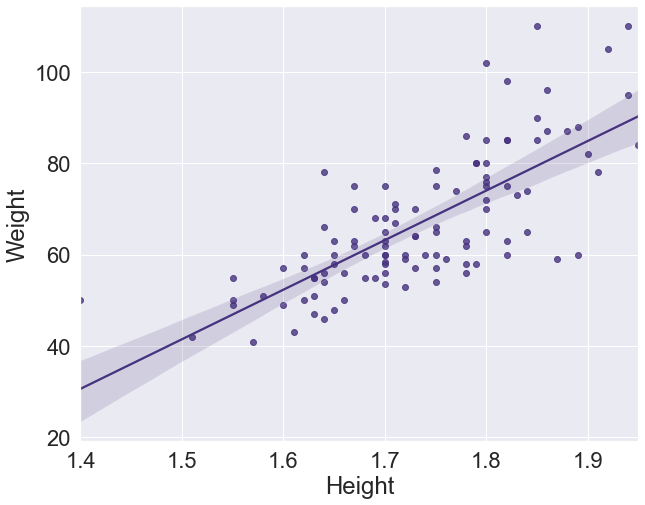

In [8]:
plt.figure(figsize=(10,8))
sns.regplot(data=data, x='Height', y="Weight")
plt.show()

In [9]:
stats.levene(data['Height'], data['Weight'])

LeveneResult(statistic=135.08608012666895, pvalue=1.5839821691245638e-24)

In [11]:
stat, p,  = stats.levene(data['Height'], data['Weight'])
print(f'stat={stat}, p-value={p}')
alpha = 0.05 
if p > alpha:
    print('The variances are equal between two groups(reject H0, not significant)')
else:
    print('The variances are not equal between two groups(reject H0, significant)')

stat=135.08608012666895, p-value=1.5839821691245638e-24
The variances are not equal between two groups(reject H0, significant)


In [ ]:
stats.pearsonr(data['Height'], data['Weight'])

In [12]:
stat, p,  = stats.pearsonr(data['Height'], data['Weight'])
print(f'stat={stat}, p-value={p}')
alpha = 0.05 
if p > alpha:
    print('There is a relationship between two variables(fail to reject H0, not significant)')
else:
    print('There is a no relationship between two variables(reject H0, significant)')

stat=0.7413041988574969, p-value=4.5627070950916043e-20
There is a no relationship between two variables(reject H0, significant)


## Spearman’s Rank Correlation Test 
Tests whether two samples have a monotonic relationship.

### Assumptions
- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.



### Interpretation
- **H0 hypothesis:** There is is relationship between variable 1 and variable 2
- **H1 hypothesis:** There is no relationship between variable 1 and variable 2


In [ ]:
stats.spearmanr(data['Height'], data['Weight'])

In [ ]:
stat, p,  = stats.spearmanr(data['Height'], data['Weight'])
print(f'stat={stat}, p-value={p}')
alpha = 0.05 
if p > alpha:
    print('There is a relationship between two variables(fail to reject H0, not significant)')
else:
    print('There is a no relationship between two variables(reject H0, significant)')

## Kendall’s Rank Correlation Test 

### Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.

### Interpretation


### Interpretation
- **H0 hypothesis:** There is a relationship between variable 1 and variable 2
- **H1 hypothesis:** There is no relationship between variable 1 and variable 2

In [ ]:
stats.spearmanr(data['Height'], data['Weight'])

In [13]:
stat, p,  = stats.kendalltau(data['Height'], data['Weight'])
print(f'stat={stat}, p-value={p}')
alpha = 0.05 
if p > alpha:
    print('Accept null hypothesis; there is a relationship between Height and Weight(fail to reject H0, not significant)')
else:
    print('Reject the null hypothesis; there is no relationship between Height and Weight (reject H0, significant)')

stat=0.57668142211864, p-value=7.200475725682383e-18
Reject the null hypothesis; there is no relationship between Height and Weight (significant)


## Chi-Squared Test
- The Chi-square test of independence tests if there is a significant relationship between two categorical variables
- The test is comparing the observed observations to the expected observations.
- The data is usually displayed in a cross-tabulation format with each row representing a category for one variable and each column representing a category for another variable.
- Chi-square test of independence is an omnibus test. Meaning it tests the data as a whole. This means that one will not be able to tell which levels (categories) of the variables are responsible for the relationship if the Chi-square table is larger than 2×2
-  If the test is larger than 2×2, it requires post hoc testing. If this doesn’t make much sense right now, don’t worry. Further explanation will be provided when we start working with the data.

### Assumptions
- It should be two categorical variables(e.g; Gender)
- Each variables should have at leats two groups(e.g; Gender = Female or Male)
- There should be independence of observations(between and within subjects)
- Large sample size 
  - The expected frequencies should be at least 1 for each cell. 
  - The expected frequencies for the majority(80%) of the cells should be at least 5.
  
If the sample size is small, we have to use **Fisher's Exact Test**

**Fisher's Exact Test** is similar to Chi-squared test, but it is used for small-sized samples.

## Interpretation 
- The H0 (Null Hypothesis): There is a relationship between variable one and variable two.
- The Ha (Alternative Hypothesis): There is no relationship between variable 1 and variable 2.

### Contingency Table
Contingency table is a table with at least two rows and two columns(2x2) and its use to present categorical data in terms of frequency counts.

In [ ]:
data = pd.read_csv('../data/KosteckiDillon.csv', usecols=['id', 'time', 'dos', 'hatype', 'age', 'airq',
       'medication', 'headache', 'sex'])
data.head() 

In [ ]:
table = pd.crosstab(data['sex'], data['headache'])
table

In [ ]:
stats.chi2_contingency(table)

In [ ]:
stat, p, dof, expected = stats.chi2_contingency(table)
print(f'stat={stat}, p-value={p}') 
if p > 0.05:
    print('There is a relationship between sex andheadache(fail to reject Ho, not significant)')
else:
    print('There is no relationship between sex  and headache.(reject H0, significant)')

## Fisher’s Test

In [ ]:
stat, p,  = stats.fisher_exact(table)
print(f'stat={stat}, p-value={p}') 
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')